In [12]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2  # importing cv
import imutils
import glob
from PIL import Image, ImageOps

#We need these in this file:
import sys
sys.path.append('cropping')
import load_read_name_extractor as lrne
import progressbar
import time

In [13]:
def it_hog(img_list, ori, ppc, cpb, bn):
    hog_features = []
    temp_list = []
    size=len(img_list)
    for i in range (size):
        temp_list.append(color.rgb2gray(img_list[i]))
        fd, hog_image = hog(temp_list[i], orientations=ori, pixels_per_cell=ppc,
                        cells_per_block=cpb, visualize=True, block_norm=bn)
        temp_list[i] = hog_image
        hog_features.append(fd)
    return temp_list, hog_features

In [14]:
def mirror_each(img):
    mirror = cv2.flip(img,1)
    flip = cv2.flip(img,0)
    mirror_flip = cv2.flip(mirror,0)
    return [mirror, flip, mirror_flip]

def expand_with_mirror(img_list, names):
    temp_img_list = []
    temp_names = []
    for i in range(len(img_list)):
        mirrors = mirror_each(img_list[i])
        temp_img_list.append(img_list[i])
        temp_names.append(names[i])
        for j in range(len(mirrors)):
            temp_img_list.append(mirrors[j])
            temp_names.append(names[i])
    return temp_img_list, temp_names

In [15]:
img_list, names = lrne.load_name_and_img("cropped_96_192/*.jpeg")

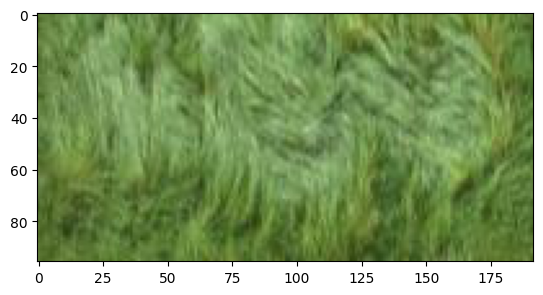

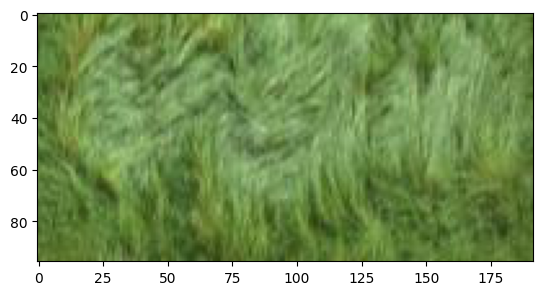

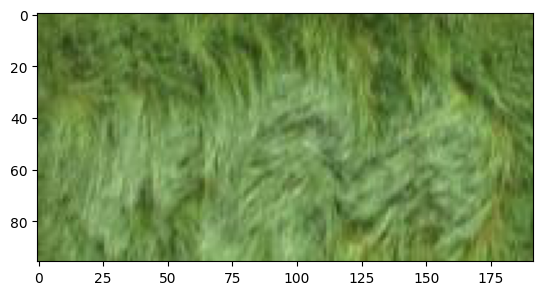

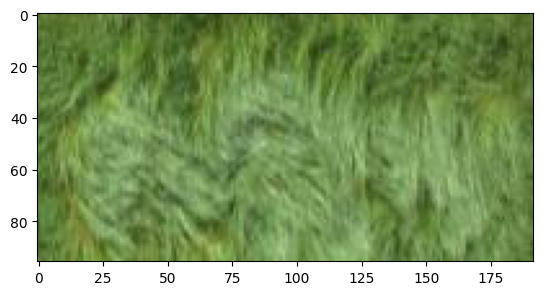

In [16]:
mirrors = mirror_each(img_list[0])
plt.imshow(img_list[0])
plt.show()
for img in mirrors:
    plt.imshow(img)
    plt.show()


In [17]:
range_x = 4
range_y = 16
range_x2 = 2
range_y2 = 10
step = 2
step2 = 2
for i in range (range_x,range_y, step):
    for j in range (range_x2,range_y2, step2):
        img_shape = img_list[0].shape
        ori=9
        ppc=(i,i)
        cpb=(j,j)
        bn="L2"
        mir = False
        if mir == True:
            img_list_t, names_t = expand_with_mirror(img_list, names)
            xxx, features = it_hog(img_list_t, ori=9, ppc=ppc, cpb=cpb, bn=bn)
            iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
            lrne.save_in_txt(names_t, "names/img_names_" + iteration)
            lrne.save_in_txt(features, "Features/hog_features_" + iteration)
        else:
            xxx, features = it_hog(img_list, ori=9, ppc=ppc, cpb=cpb, bn=bn)
            iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
            lrne.save_in_txt(names, "names/img_names_" + iteration)
            lrne.save_in_txt(features, "Features/hog_features_" + iteration)
    

In [ ]:
features[0].shape

(4320,)